In [1]:
import pandas as pd
# Cambia 'archivo.csv' por el nombre real de tus archivos
df = pd.read_csv('titulos.csv')
print(df.head())


   anio  mes documento                        nombre_completo  carrera_id  \
0     1   11   4293889              BERNARDINA ROLON GUERRERO         111   
1     1   12   4233874              EDI ISABEL BERNAL BENITEZ         111   
2     2    3   1884029         LIDUVINA CABRERA DE PRESENTADO          41   
3     2   12   1262724                     AIDA MABEL CABRERA          49   
4     3   12   3501374  JORGELINA GOMEZ DE LA FUENTE SANABRIA          79   

                    carrera  titulo_id  \
0                ENFERMERIA        110   
1                ENFERMERIA        792   
2        CIENCIAS CONTABLES        792   
3  CIENCIAS DE LA EDUCACION        580   
4                   DERECHO         62   

                                     titulo numero_resolucion  \
0                LICENCIADO/A EN ENFERMERIA              1545   
1                              LICENCIADO/A               S/R   
2                              LICENCIADO/A       DGES Nº 166   
3  LICENCIADO/A EN CIENC

In [2]:
print(df.info())
print(df.columns)
print(df.describe(include='all'))
# Para ver mejor la salida usar display
from IPython.display import display
display(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655277 entries, 0 to 655276
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   anio                 655277 non-null  int64  
 1   mes                  655277 non-null  int64  
 2   documento            655277 non-null  object 
 3   nombre_completo      655277 non-null  object 
 4   carrera_id           655277 non-null  int64  
 5   carrera              655277 non-null  object 
 6   titulo_id            655277 non-null  int64  
 7   titulo               655277 non-null  object 
 8   numero_resolucion    655274 non-null  object 
 9   fecha_resolucion     655263 non-null  object 
 10  tipo_institucion_id  655249 non-null  float64
 11  tipo_institucion     655249 non-null  object 
 12  institucion_id       655277 non-null  int64  
 13  institucion          655277 non-null  object 
 14  gobierno_actual      655277 non-null  object 
 15  sexo             

,anio,mes,documento,nombre_completo,carrera_id,carrera,titulo_id,titulo,numero_resolucion,fecha_resolucion,tipo_institucion_id,tipo_institucion,institucion_id,institucion,gobierno_actual,sexo
count,655277.000000,655277.000000,655277,655277,655277.000000,655277,655277.000000,655277,655274,655263,655249.000000,655249,6.552770e+05,655277,655277,654114
unique,NaN,NaN,458959,458268,NaN,2032,NaN,963,106929,5921,NaN,12,NaN,513,2,2
top,NaN,NaN,2451153,DENIS ALBERTO JARA VERA,NaN,ENFERMERIA,NaN,LICENCIADO/A,S/R,2015-12-30,NaN,UNIVERSIDAD,NaN,UNIVERSIDAD TECNICA DE COMERCIALIZACION Y DESA...,Si,MUJER
freq,NaN,NaN,17,17,NaN,50618,NaN,211822,8025,2917,NaN,440887,NaN,32713,622784,430480
mean,2019.765231,6.592511,NaN,NaN,944.459868,NaN,1550.881890,NaN,NaN,NaN,15.313493,NaN,4.236464e+05,NaN,NaN,NaN
std,62.078604,3.475382,NaN,NaN,1435.285052,NaN,995.981537,NaN,NaN,NaN,2.613068,NaN,2.609253e+05,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,6.000000,NaN,7.002300e+04,NaN,NaN,NaN
25%,2017.000000,4.000000,NaN,NaN,79.000000,NaN,792.000000,NaN,NaN,NaN,16.000000,NaN,3.169060e+05,NaN,NaN,NaN
50%,2021.000000,7.000000,NaN,NaN,208.000000,NaN,1908.000000,NaN,NaN,NaN,16.000000,NaN,3.169440e+05,NaN,NaN,NaN
75%,2023.000000,10.000000,NaN,NaN,984.000000,NaN,2119.000000,NaN,NaN,NaN,16.000000,NaN,3.206250e+05,NaN,NaN,NaN


In [3]:
print(df.isnull().sum())


anio                      0
mes                       0
documento                 0
nombre_completo           0
carrera_id                0
carrera                   0
titulo_id                 0
titulo                    0
numero_resolucion         3
fecha_resolucion         14
tipo_institucion_id      28
tipo_institucion         28
institucion_id            0
institucion               0
gobierno_actual           0
sexo                   1163
dtype: int64


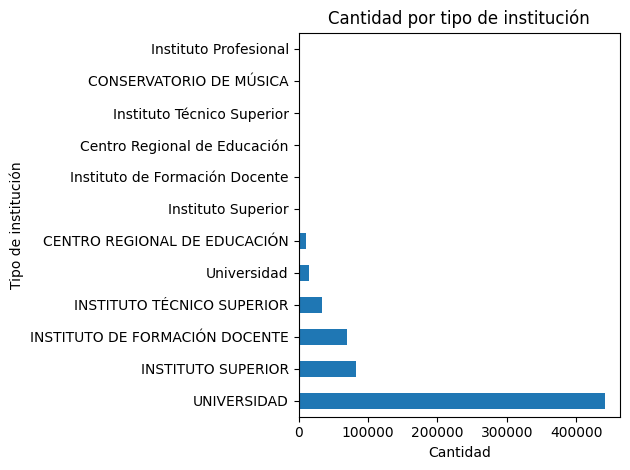

In [9]:
import matplotlib.pyplot as plt

df['tipo_institucion'].value_counts().plot(kind='barh')
plt.xlabel("Cantidad")
plt.ylabel("Tipo de institución")
plt.title("Cantidad por tipo de institución")
plt.tight_layout()
plt.show()



**Detección temprana de posibles duplicados semánticos en campos categóricos**

No existe un comando de pandas que "adivine" y te agrupe automáticamente las variantes, pero sí hay buenas prácticas y algunos trucos útiles:

1. Ver valores únicos en minúsculas y comparar contra los originales

In [5]:
orig = set(df['tipo_institucion'].unique())
normalized = set(df['tipo_institucion'].str.lower().str.strip().unique())
print(f"Número de categorías originales: {len(orig)}")
print(f"Número de categorías normalizadas: {len(normalized)}")
if len(orig) != len(normalized):
    print("¡Atención: hay posibles duplicados por diferencias de mayúsculas/minúsculas o espacios!")


Número de categorías originales: 13
Número de categorías normalizadas: 8
¡Atención: hay posibles duplicados por diferencias de mayúsculas/minúsculas o espacios!


2. Mostrar “grupos” de valores que solo difieren por casing/espacios.
Esto te muestra exactamente qué valores únicos serían agrupados si tratas todo igual (útil para "ver" los falsos duplicados).

In [6]:
# Crea un mapeo de valores originales agrupados por su versión normalizada
from collections import defaultdict
groups = defaultdict(set)
for val in df['tipo_institucion'].unique():
    groups[str(val).strip().lower()].add(val)
# Filtra los que tienen más de una variante:
duplicados = {norm: variants for norm, variants in groups.items() if len(variants) > 1}
print(duplicados)


{'universidad': {'UNIVERSIDAD', 'Universidad'}, 'instituto de formación docente': {'INSTITUTO DE FORMACIÓN DOCENTE', 'Instituto de Formación Docente'}, 'instituto superior': {'Instituto Superior', 'INSTITUTO SUPERIOR'}, 'instituto técnico superior': {'INSTITUTO TÉCNICO SUPERIOR', 'Instituto Técnico Superior'}, 'centro regional de educación': {'CENTRO REGIONAL DE EDUCACIÓN', 'Centro Regional de Educación'}}


3. Limpiar y ver Estadísticas rápidas:

In [7]:
df['tipo_institucion_normalizado'] = df['tipo_institucion'].str.lower().str.strip()
print(df['tipo_institucion_normalizado'].value_counts())


tipo_institucion_normalizado
universidad                       456059
instituto superior                 83937
instituto de formación docente     70097
instituto técnico superior         33904
centro regional de educación       11169
conservatorio de música               67
instituto profesional                 16
Name: count, dtype: int64


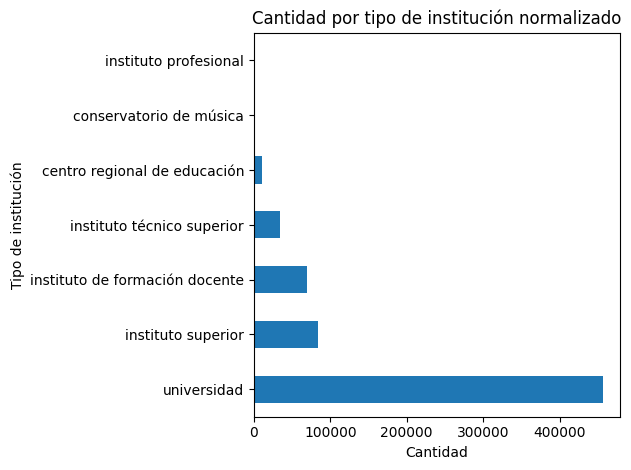

In [11]:
df['tipo_institucion_normalizado'].value_counts().plot(kind='barh')
plt.xlabel("Cantidad")
plt.ylabel("Tipo de institución")
plt.title("Cantidad por tipo de institución normalizado")
plt.tight_layout()
plt.show()



*Función para detectar posibles duplicados en todas las columnas*

In [18]:
def detectar_duplicados_categoricos(df):
    """
    Detecta posibles duplicados por diferencias de mayúsculas/minúsculas 
    y espacios en todas las columnas categóricas del DataFrame
    """
    print("=== ANÁLISIS DE DUPLICADOS CATEGÓRICOS ===\n")
    
    # Filtrar solo columnas de tipo object (categóricas/string)
    columnas_categoricas = df.select_dtypes(include=['object']).columns
    
    problemas_encontrados = []
    
    for columna in columnas_categoricas:
        print(f"📊 Analizando: {columna}")
        
        # Obtener valores únicos originales y normalizados
        orig = set(df[columna].dropna().unique())
        # Normalización extendida: minúsculas + espacios + acentos
        normalized = set(
            df[columna]
            .dropna()
            .astype(str)
            .str.lower()
            .str.strip()
            .str.normalize('NFKD')
            .str.encode('ascii', 'ignore')
            .str.decode('utf-8')
            .unique()
        )
        
        print(f"   Categorías originales: {len(orig)}")
        print(f"   Categorías normalizadas: {len(normalized)}")
        
        if len(orig) != len(normalized):
            diferencia = len(orig) - len(normalized)
            print(f"   ⚠️  ATENCIÓN: {diferencia} posibles duplicados detectados!")
            problemas_encontrados.append((columna, diferencia))
        else:
            print("   ✅ Sin duplicados detectados")
        
        print("-" * 50)
    
    # Resumen final
    if problemas_encontrados:
        print("\n🚨 RESUMEN DE PROBLEMAS ENCONTRADOS:")
        for columna, cantidad in problemas_encontrados:
            print(f"   • {columna}: {cantidad} duplicados potenciales")
    else:
        print("\n✅ No se encontraron duplicados en ninguna columna categórica")

# Ejecutar la función
detectar_duplicados_categoricos(df)


=== ANÁLISIS DE DUPLICADOS CATEGÓRICOS ===

📊 Analizando: documento
   Categorías originales: 458959
   Categorías normalizadas: 458807
   ⚠️  ATENCIÓN: 152 posibles duplicados detectados!
--------------------------------------------------
📊 Analizando: nombre_completo
   Categorías originales: 458268
   Categorías normalizadas: 457806
   ⚠️  ATENCIÓN: 462 posibles duplicados detectados!
--------------------------------------------------
📊 Analizando: carrera
   Categorías originales: 2032
   Categorías normalizadas: 1941
   ⚠️  ATENCIÓN: 91 posibles duplicados detectados!
--------------------------------------------------
📊 Analizando: titulo
   Categorías originales: 963
   Categorías normalizadas: 901
   ⚠️  ATENCIÓN: 62 posibles duplicados detectados!
--------------------------------------------------
📊 Analizando: numero_resolucion
   Categorías originales: 106929
   Categorías normalizadas: 106907
   ⚠️  ATENCIÓN: 22 posibles duplicados detectados!
-------------------------------

**Técnicas más avanzadas para detectar duplicados "semánticos" que van más allá de la normalización básica:**

Función "integradora avanzada" adaptada para recorrer todas las columnas categóricas del DataFrame y aplicar fuzzy matching, abreviación y clustering:

In [25]:
from fuzzywuzzy import fuzz
import itertools
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

def detectar_similares_fuzzy(valores, umbral=85):
    similares = []
    valores_unicos = list(set(valores))
    for val1, val2 in itertools.combinations(valores_unicos, 2):
        ratio = fuzz.ratio(str(val1), str(val2))
        if ratio >= umbral:
            similares.append((val1, val2, ratio))
    return similares

def detectar_abreviaciones(valores):
    abreviaciones = []
    valores_unicos = list(set(valores))
    for val1, val2 in itertools.combinations(valores_unicos, 2):
        str1, str2 = str(val1).lower(), str(val2).lower()
        if str1 in str2 or str2 in str1:
            abreviaciones.append((val1, val2))
        iniciales1 = ''.join([word[0] for word in str1.split() if word])
        iniciales2 = ''.join([word[0] for word in str2.split() if word])
        if iniciales1 == str2 or iniciales2 == str1:
            abreviaciones.append((val1, val2))
    return abreviaciones

def agrupar_similares_automatico(valores, eps=0.3):
    vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2,3))
    tfidf_matrix = vectorizer.fit_transform([str(v) for v in valores])
    clustering = DBSCAN(eps=eps, min_samples=2, metric='cosine')
    cluster_labels = clustering.fit_predict(tfidf_matrix)
    grupos = defaultdict(list)
    for i, label in enumerate(cluster_labels):
        if label != -1:
            grupos[label].append(valores[i])
    return grupos

def diagnostico_avanzado_duplicados_allcols(df, tecnicas=['fuzzy', 'abrev', 'cluster'], fuzzy_umbral=85):
    """
    Aplica múltiples técnicas de detección de duplicados en todas las columnas categóricas
    """
    columnas_categoricas = df.select_dtypes(include=['object']).columns
    for columna in columnas_categoricas:
        print(f"\n🔍 Análisis avanzado de '{columna}'")
        valores = df[columna].dropna().unique()
        print(f"  ({len(valores)} valores únicos)")
        if 'fuzzy' in tecnicas:
            similares = detectar_similares_fuzzy(valores, fuzzy_umbral)
            if similares:
                print(f"  📊 Similitud fuzzy (>={fuzzy_umbral}%): mostrando primeros 3")
                for v1, v2, score in similares[:3]:
                    print(f"     {score}%: '{v1}' ≈ '{v2}'")
            else:
                print("     Ningún par supera el umbral definido.")
        if 'abrev' in tecnicas:
            abrev = detectar_abreviaciones(valores)
            if abrev:
                print("  🔤 Posibles abreviaciones: mostrando primeros 3")
                for v1, v2 in abrev[:3]:
                    print(f"     '{v1}' ↔ '{v2}'")
            else:
                print("     No se detectaron abreviaciones obvias.")
        if 'cluster' in tecnicas:
            grupos = agrupar_similares_automatico(valores)
            if grupos:
                print("  🎯 Agrupamiento automático (primeros 3 grupos):")
                for i, (cluster, items) in enumerate(grupos.items()):
                    if i < 3:
                        print(f"     Grupo {cluster}: {items}")
            else:
                print("     No se formaron grupos automáticos.")
        print("-" * 60)

# Ejemplo de uso:
diagnostico_avanzado_duplicados_allcols(df, ['fuzzy', 'abrev', 'cluster'], fuzzy_umbral=85)



🔍 Análisis avanzado de 'documento'
  (458959 valores únicos)


KeyboardInterrupt: 